In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
travel_times_url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/e05188e5-7af8-426a-8080-942437526a16/resource/c0047fbc-73f2-40e6-8490-195c26195002/download/detailed-bluetooth-travel-time-2017.gz'

travel_times = pd.read_csv(travel_times_url)

travel_times.iloc[:5]

,result_id,datetime_bin,day_type,category,period_name,tt,obs
0,CO_BA_CO_UN,2017-09-21 00:15:00,Weekday,Baseline,NaN,318.0,1
1,CO_BA_CO_UN,2017-09-21 00:55:00,Weekday,Baseline,NaN,225.0,1
2,CO_BA_CO_UN,2017-09-21 01:10:00,Weekday,Baseline,NaN,193.0,1
3,CO_BA_CO_UN,2017-09-21 01:40:00,Weekday,Baseline,NaN,224.0,1
4,CO_BA_CO_UN,2017-09-21 01:45:00,Weekday,Baseline,NaN,275.0,1


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd

# Did traffic get better or worse? on the following slices of the data
# Weekdays from Yonge to Jarvis
# Yes
# Weekends from Jarvis to Parliament
# Yes

#The percent difference shows that traffic gets much worse on weekends (46.3%) from Jarvis to Parliament compared to Yonge to Jarvis on weekdays (20.9%).

In [ ]:
#From Yonge to Jarvis
baseline_result


,category,tt,obs,time for pilot,pct_diff
day_type,,,,,
Weekday,Baseline,2.2,1.500196,2.66,20.909091


In [ ]:
#Jarvis to Parliament
baseline_result

,category,tt,obs,time for pilot,pct_diff
day_type,,,,,
Weekend,Baseline,2.35,1.205882,3.44,46.382979


 Did traffic get better or worse? on the following slices of the data
 Weekdays from Yonge to Jarvis 

In [ ]:
# GeoJSON file that describes the segments
url_seg = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/b24095b2-8c2f-43d9-a257-b351c61432a6/resource/12f52800-9435-4c30-b38f-076b4dfedb32/download/bluetooth-travel-time-segments-geojson.geojson'

df_places = gpd.read_file(url_seg)

df_places.head()


,segment_name,street,direction,from_intersection,to_intersection,length,geometry
0,DU_BA_CO_BA,Bathurst,NB,Dundas,College,510,"MULTILINESTRING ((-79.40602 43.65231, -79.4068..."
1,CO_BA_CO_UN,College,EB,Bathurst,University,1430,"MULTILINESTRING ((-79.40772 43.65648, -79.4065..."
2,CO_PA_CO_UN,College,WB,Parliament,University,1895,"MULTILINESTRING ((-79.36798 43.66429, -79.3693..."
3,CO_PA_DU_PA,Parliament,SB,College,Dundas,586,"MULTILINESTRING ((-79.36798 43.66429, -79.3678..."
4,CO_UN_CO_BA,College,WB,University,Bathurst,1430,"MULTILINESTRING ((-79.39049 43.65986, -79.3925..."


In [ ]:
# use conditional indexing or filtering to find the segment name that goes from Yonge to Jarvis.

df1 = df_places[df_places['street'] == 'King']

df2 = df1[df1['direction'] == 'EB']

df3_YJ = df2[df2['from_intersection'] == 'Yonge']

df3_YJ

,segment_name,street,direction,from_intersection,to_intersection,length,geometry
110,KN_YO_KN_JA,King,EB,Yonge,Jarvis,509,"MULTILINESTRING ((-79.37792 43.64915, -79.3767..."


In [ ]:
#Answer the following question Did traffic get better or worse? on the following slices of the data
#Weekdays from Yonge to Jarvis
#Weekends from Jarvis to Parliament
#Calculate the travel times in your analysis in minutes, not seconds.

df1 = df_places[df_places['street'] == 'King']

df2 = df1[df1['direction'] == 'EB']

df3_JP = df2[df2['from_intersection'] == 'Jarvis']

df3_JP

,segment_name,street,direction,from_intersection,to_intersection,length,geometry
66,KN_JA_KN_PA,King,EB,Jarvis,Parliament,779,"MULTILINESTRING ((-79.37191 43.65046, -79.3706..."


In [ ]:
yonge_jarvis = travel_times[travel_times['result_id'] == 'KN_YO_KN_JA']
yonge_jarvis.head()

,result_id,datetime_bin,day_type,category,period_name,tt,obs
552151,KN_YO_KN_JA,2017-09-21 00:05:00,Weekday,Baseline,NaN,50.0,1
552152,KN_YO_KN_JA,2017-09-21 00:20:00,Weekday,Baseline,NaN,77.0,1
552153,KN_YO_KN_JA,2017-09-21 00:25:00,Weekday,Baseline,NaN,129.0,1
552154,KN_YO_KN_JA,2017-09-21 00:35:00,Weekday,Baseline,NaN,99.5,2
552155,KN_YO_KN_JA,2017-09-21 00:45:00,Weekday,Baseline,NaN,115.0,2


In [ ]:
#Now let's describe our current dataset.
yonge_jarvis.describe(include='all')

,result_id,datetime_bin,day_type,category,period_name,tt,obs
count,7120,7120,7120,7120,5554,7120.000000,7120.000000
unique,1,7120,2,3,6,NaN,NaN
top,KN_YO_KN_JA,2017-09-21 00:05:00,Weekday,Baseline,Midday,NaN,NaN
freq,7120,1,5292,3878,1571,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,125.393469,1.324017
std,NaN,NaN,NaN,NaN,NaN,74.729945,0.649537
min,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,82.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,110.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,151.000000,1.000000


In [ ]:
#Let's analyze what the unique values are in each of our columns.
yonge_jarvis['period_name'].unique()

array([nan, 'AM Peak', 'Midday', 'PM Peak', 'Evening', 'Morning',
       'Afternoon'], dtype=object)

In [ ]:
yonge_jarvis['day_type'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [ ]:
yonge_jarvis['category'].unique()

array(['Baseline', 'Excluded', 'Pilot'], dtype=object)

In [ ]:
#Data Cleaning
#Drop missing data
yonge_jarvis = yonge_jarvis.dropna(subset=['period_name'])

In [ ]:
#Second, we're going to slice the data to include only the data from either the "Baseline" or "Pilot" categories. We're going to use conditional indexing to do this. 

In [ ]:
yonge_jarvis['category'].unique()

array(['Baseline', 'Excluded', 'Pilot'], dtype=object)

In [ ]:
yonge_jarvis = yonge_jarvis[yonge_jarvis['category'] != 'Excluded']

In [ ]:
#Now there should be no more "Excluded" category in the dataset:
yonge_jarvis['category'].unique()

array(['Baseline', 'Pilot'], dtype=object)

In [ ]:
#Now, let's use Pandas Groupby() to aggregate the data and calculate the mean travel time in seconds.

In [ ]:
compare_summ = yonge_jarvis.groupby(['category','day_type']).mean()
compare_summ

tt       obs
category day_type                      
Baseline Weekday   132.187818  1.500196
         Weekend   111.291602  1.293935
Pilot    Weekday   159.828892  1.082749
         Weekend   193.236422  1.130990

In [ ]:
compare_summ = yonge_jarvis.groupby(['category', 'day_type']).median()
compare_summ

tt  obs
category day_type            
Baseline Weekday   121.0  1.0
         Weekend   104.0  1.0
Pilot    Weekday   151.0  1.0
         Weekend   132.0  1.0

In [ ]:
compare_summ = yonge_jarvis.groupby(['category','day_type']).mean()
compare_summ

tt       obs
category day_type                      
Baseline Weekday   132.187818  1.500196
         Weekend   111.291602  1.293935
Pilot    Weekday   159.828892  1.082749
         Weekend   193.236422  1.130990

In [ ]:
#Separate the data in two dataframes
compare_summ = compare_summ.reset_index()
compare_summ

,category,day_type,tt,obs
0,Baseline,Weekday,132.187818,1.500196
1,Baseline,Weekend,111.291602,1.293935
2,Pilot,Weekday,159.828892,1.082749
3,Pilot,Weekend,193.236422,1.130990


In [ ]:
compare_summ['tt']

0    132.187818
1    111.291602
2    159.828892
3    193.236422
Name: tt, dtype: float64

In [ ]:
#apply lambda function that converts seconds to minutes
#Percentage = lambda x: (x['Total_Marks'] /500 * 100))
import datetime
compare_summ['tt']=round(compare_summ['tt'].apply(lambda x: x*1/60),2)


In [ ]:
#Only want weekday
baseline_result = compare_summ[(compare_summ['category'] == 'Baseline') & (compare_summ['day_type']== 'Weekday')]


In [ ]:
baseline_result.set_index('category')

,day_type,tt,obs
category,,,
Baseline,Weekday,2.2,1.500196


In [ ]:
pilot_result = compare_summ[(compare_summ['category'] == 'Pilot') & (compare_summ['day_type']== 'Weekday')]

In [ ]:
pilot_result.set_index('category')

,day_type,tt,obs
category,,,
Pilot,Weekday,2.66,1.082749


In [ ]:
baseline_result

,category,day_type,tt,obs
0,Baseline,Weekday,2.2,1.500196


In [ ]:
pilot_result

,category,day_type,tt,obs
2,Pilot,Weekday,2.66,1.082749


In [ ]:
baseline_result = baseline_result.set_index('day_type')
pilot_result = pilot_result.set_index('day_type')

In [ ]:
baseline_result

,category,tt,obs
day_type,,,
Weekday,Baseline,2.2,1.500196


In [ ]:
pilot_result

,category,tt,obs
day_type,,,
Weekday,Pilot,2.66,1.082749


In [ ]:
baseline_result['time for pilot'] = pilot_result['tt']
baseline_result

,category,tt,obs,time for pilot
day_type,,,,
Weekday,Baseline,2.2,1.500196,2.66


In [ ]:
# (new value - old value) / (old value) * 100
baseline_result['pct_diff'] = (baseline_result['time for pilot'] - baseline_result['tt']) / baseline_result['tt'] * 100

In [ ]:
baseline_result


,category,tt,obs,time for pilot,pct_diff
day_type,,,,,
Weekday,Baseline,2.2,1.500196,2.66,20.909091


In [ ]:
baseline_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Weekday to Weekday
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        1 non-null      object 
 1   tt              1 non-null      float64
 2   obs             1 non-null      float64
 3   time for pilot  1 non-null      float64
 4   pct_diff        1 non-null      float64
dtypes: float64(4), object(1)
memory usage: 48.0+ bytes


# Answer the following question **Did traffic get better or worse?** 
# - Weekends from Jarvis to Parliament

# Calculate the travel times in your analysis in **minutes**, not **seconds**.




In [ ]:
# GeoJSON file that describes the segments
url_seg = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/b24095b2-8c2f-43d9-a257-b351c61432a6/resource/12f52800-9435-4c30-b38f-076b4dfedb32/download/bluetooth-travel-time-segments-geojson.geojson'

df_places = gpd.read_file(url_seg)

df_places.head()

,segment_name,street,direction,from_intersection,to_intersection,length,geometry
0,DU_BA_CO_BA,Bathurst,NB,Dundas,College,510,"MULTILINESTRING ((-79.40602 43.65231, -79.4068..."
1,CO_BA_CO_UN,College,EB,Bathurst,University,1430,"MULTILINESTRING ((-79.40772 43.65648, -79.4065..."
2,CO_PA_CO_UN,College,WB,Parliament,University,1895,"MULTILINESTRING ((-79.36798 43.66429, -79.3693..."
3,CO_PA_DU_PA,Parliament,SB,College,Dundas,586,"MULTILINESTRING ((-79.36798 43.66429, -79.3678..."
4,CO_UN_CO_BA,College,WB,University,Bathurst,1430,"MULTILINESTRING ((-79.39049 43.65986, -79.3925..."


In [ ]:
df1 = df_places[df_places['street'] == 'King']

df2 = df1[df1['direction'] == 'EB']

df3_JP = df2[df2['from_intersection'] == 'Jarvis']

df3_JP

,segment_name,street,direction,from_intersection,to_intersection,length,geometry
66,KN_JA_KN_PA,King,EB,Jarvis,Parliament,779,"MULTILINESTRING ((-79.37191 43.65046, -79.3706..."


In [ ]:
jarvis_parliament = travel_times[travel_times['result_id'] == 'KN_JA_KN_PA']
jarvis_parliament

,result_id,datetime_bin,day_type,category,period_name,tt,obs
559271,KN_JA_KN_PA,2017-09-21 00:10:00,Weekday,Baseline,NaN,132.0,1
559272,KN_JA_KN_PA,2017-09-21 00:15:00,Weekday,Baseline,NaN,77.0,1
559273,KN_JA_KN_PA,2017-09-21 00:20:00,Weekday,Baseline,NaN,82.0,1
559274,KN_JA_KN_PA,2017-09-21 01:05:00,Weekday,Baseline,NaN,110.0,1
559275,KN_JA_KN_PA,2017-09-21 01:20:00,Weekday,Baseline,NaN,118.0,1
...,...,...,...,...,...,...,...
564444,KN_JA_KN_PA,2017-12-31 19:30:00,Weekend,Pilot,Evening,159.0,1
564445,KN_JA_KN_PA,2017-12-31 20:35:00,Weekend,Pilot,Evening,129.0,1
564446,KN_JA_KN_PA,2017-12-31 21:50:00,Weekend,Pilot,Evening,180.0,1
564447,KN_JA_KN_PA,2017-12-31 22:20:00,Weekend,Pilot,Evening,121.0,1


In [ ]:
#Now let's describe our current dataset.
# Your code here
#Answer the following question Did traffic get better or worse? on the following slices of the data
#Weekdays from Yonge to Jarvis
#Weekends from Jarvis to Parliament
#Calculate the travel times in your analysis in minutes, not seconds.
jarvis_parliament.describe(include='all')

,result_id,datetime_bin,day_type,category,period_name,tt,obs
count,5178,5178,5178,5178,4165,5178.000000,5178.000000
unique,1,5178,2,3,6,NaN,NaN
top,KN_JA_KN_PA,2017-09-21 00:10:00,Weekday,Baseline,Midday,NaN,NaN
freq,5178,1,3832,2730,1140,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,158.078216,1.219003
std,NaN,NaN,NaN,NaN,NaN,75.486611,0.523663
min,NaN,NaN,NaN,NaN,NaN,23.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,112.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,146.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,187.000000,1.000000


In [ ]:
#Let's analyze what the unique values are in each of our columns.
jarvis_parliament['period_name'].unique()

array([nan, 'AM Peak', 'Midday', 'PM Peak', 'Evening', 'Morning',
       'Afternoon'], dtype=object)

In [ ]:
jarvis_parliament['day_type'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [ ]:
jarvis_parliament['category'].unique()

array(['Baseline', 'Excluded', 'Pilot'], dtype=object)

In [ ]:
#Data Cleaning
#Drop missing data
jarvis_parliament = jarvis_parliament.dropna(subset=['period_name'])

In [ ]:
jarvis_parliament['category'].unique()

array(['Baseline', 'Excluded', 'Pilot'], dtype=object)

In [ ]:
jarvis_parliament = jarvis_parliament[jarvis_parliament['category'] != 'Excluded']

In [ ]:
#Now there should be no more "Excluded" category in the dataset:
jarvis_parliament['category'].unique()

array(['Baseline', 'Pilot'], dtype=object)

In [ ]:
compare_summ = jarvis_parliament.groupby(['category', 'day_type']).median()
compare_summ

tt  obs
category day_type            
Baseline Weekday   166.0  1.0
         Weekend   135.0  1.0
Pilot    Weekday   169.0  1.0
         Weekend   166.0  1.0

In [ ]:
compare_summ = jarvis_parliament.groupby(['category', 'day_type']).mean()
compare_summ

tt       obs
category day_type                      
Baseline Weekday   171.388643  1.331302
         Weekend   141.006303  1.205882
Pilot    Weekday   184.301843  1.069124
         Weekend   206.285441  1.084291

In [ ]:
#Separate the data in two dataframes
compare_summ = compare_summ.reset_index()
compare_summ

,category,day_type,tt,obs
0,Baseline,Weekday,171.388643,1.331302
1,Baseline,Weekend,141.006303,1.205882
2,Pilot,Weekday,184.301843,1.069124
3,Pilot,Weekend,206.285441,1.084291


In [ ]:
#apply lambda function that converts seconds to minutes
import datetime
compare_summ['tt']=round(compare_summ['tt'].apply(lambda x: x*1/60),2)
#Percentage = lambda x: (x['Total_Marks'] /500 * 100))


In [ ]:
baseline_result = compare_summ[(compare_summ['category'] == 'Baseline') & (compare_summ['day_type']== 'Weekend')]

In [ ]:
baseline_result.set_index('category')

,day_type,tt,obs
category,,,
Baseline,Weekend,2.35,1.205882


In [ ]:
baseline_result

,category,day_type,tt,obs
1,Baseline,Weekend,2.35,1.205882


In [ ]:
pilot_result = compare_summ[(compare_summ['category'] == 'Pilot') & (compare_summ['day_type']== 'Weekend')]

In [ ]:
pilot_result.set_index('category')

,day_type,tt,obs
category,,,
Pilot,Weekend,3.44,1.084291


In [ ]:
baseline_result = baseline_result.set_index('day_type')
pilot_result = pilot_result.set_index('day_type')

In [ ]:
baseline_result

,category,tt,obs
day_type,,,
Weekend,Baseline,2.35,1.205882


In [ ]:
pilot_result

,category,tt,obs
day_type,,,
Weekend,Pilot,3.44,1.084291


In [ ]:
baseline_result['time for pilot'] = pilot_result['tt']
baseline_result

,category,tt,obs,time for pilot
day_type,,,,
Weekend,Baseline,2.35,1.205882,3.44


In [ ]:
# (new value - old value) / (old value) * 100
baseline_result['pct_diff'] = (baseline_result['time for pilot'] - baseline_result['tt']) / baseline_result['tt'] * 100

In [ ]:
baseline_result

,category,tt,obs,time for pilot,pct_diff
day_type,,,,,
Weekend,Baseline,2.35,1.205882,3.44,46.382979


## Visualizations

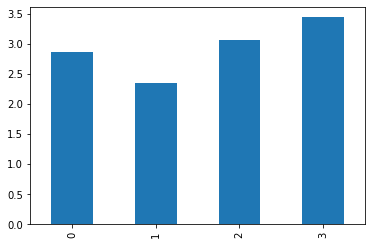

In [ ]:
compare_summ['tt'].plot(kind='bar')

In [ ]:
# fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(data=compare_summ, x='period_name', y='tt', hue='category')

# ax1.legend(loc='upper left')

Text(0.5, 0, 'Period Name')

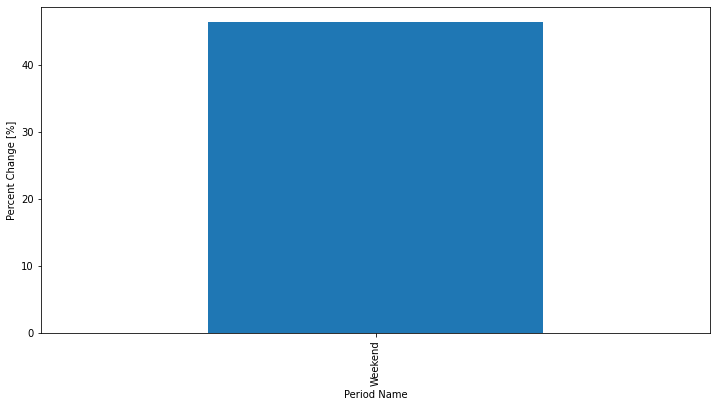

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

baseline_result['pct_diff'].plot(kind='bar', ax=ax1)

ax1.set_ylabel('Percent Change [%]')

ax1.set_xlabel('Period Name')